<a href="https://colab.research.google.com/github/einsteinxx/COMSCI_168_SPRING_2019/blob/master/Copy_of_Week3_Discussion_CS168_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 168- Discussion Week 3    TA: Ali Hatamizadeh

### Load and rotate an image

Saving phantom.png to phantom.png
(512, 512)


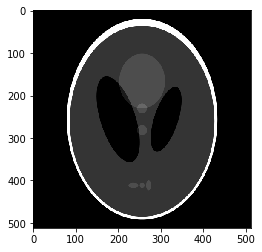

In [3]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import files
import warnings
from matplotlib import pyplot as plt
import cv2
from time import time
warnings.filterwarnings('ignore') #ignore warnings

from io import BytesIO

uploaded = files.upload()

img = Image.open(BytesIO(uploaded['phantom.png']))


img=np.array(img)[:,:,0]
# img = cv2.imread('phantom.png')[:,:,0]


plt.figure()

plt.imshow(img, cmap='gray')

print(np.shape(img))

### Radon Transform and sonogram

The basic problem of tomography is given a set of 1-D projections and the angles at which the projections were taken how can we reconstruct a 2-D image.

We define the 1-D projection $g(\phi, s)$ at angle $\phi$ and is dinstance s from the origin. Then the radon transform is

$$g(t, \theta) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}f(x, y)\delta(xcos\theta + ysin\theta -t)dxdy$$




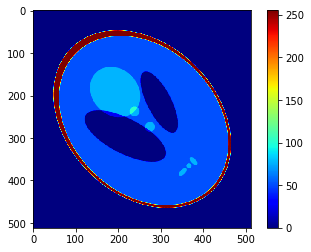

In [6]:
rot_img=misc.imrotate(img,45)

plt.figure()

plt.imshow(rot_img, cmap='jet')
plt.colorbar()


Using scikit-image package, apply the radon transform and obtain a sonogram of the image. Visualize the results and time how long it takes for the sinogram to be generated. 

Look at the documentation for radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.radon). 

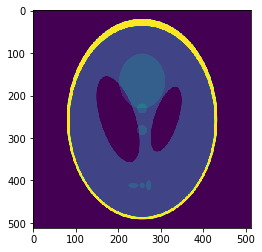

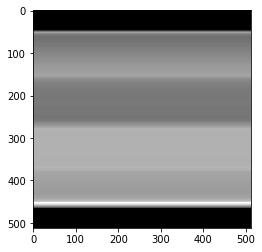

In [15]:
from skimage.transform import radon
theta = np.linspace(45.,45.,len(img))
s = radon(img,theta = theta,circle=True)

plt.figure()
plt.imshow(img)

plt.figure()
plt.imshow(s,cmap='gray')

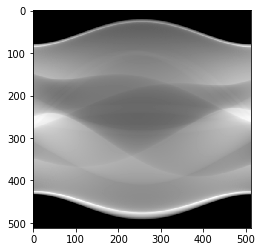

In [7]:
from skimage.transform import radon

theta = np.linspace(0., 180., len(img))
sinogram_scikit = radon(img, theta=theta, circle=True)

plt.figure()

plt.imshow(sinogram_scikit, cmap='gray')

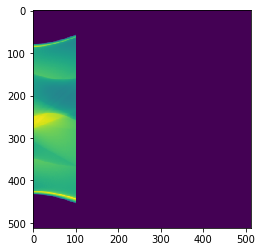

In [28]:
def s(img):
  r = np.zeros((len(img),len(img)),dtype='float64')
  angles = 180.0/len(img)
  
  
  
  for ii in range(0,100):
    #print("running on " + str(ii))
    rot = misc.imrotate(img,-ii*angles).astype('float64')
    r[:,ii]=sum(rot)
  return r

rt=s(img)

plt.figure()
plt.imshow(rt)

Implement a sonogram function here from scratch. Visualize the results and print how long it takes for the operation to execute: 

time that it takes is 5.923876523971558 seconds 


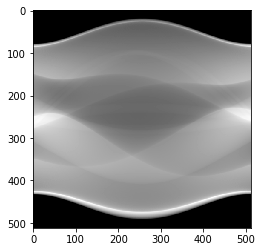

In [16]:
def sonogram(img):
    radon = np.zeros((len(img), len(img)), dtype='float64')
    for i in range(len(img)):
        rot = misc.imrotate(img, -i * 180 / len(img)).astype('float64')
        radon[:, i] = sum(rot)
    return radon

s1=time()  
rt_transformed=sonogram(img)
print('time that it takes is {} seconds '.format(time()-s1))

plt.figure()

plt.imshow(rt_transformed, cmap='gray')

Using scikit-image package, apply the inverse radon transform and obtain the reconstructed image from the  sonogram that was generated earlier. Visualize the results and time how long it takes for the sinogram to be generated. 

Look at the documentation for the inverse radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.iradon). 

In [0]:
from skimage.transform import iradon

reconstructed_scikit = iradon(sinogram_scikit, theta=theta, circle=True)

plt.figure()

plt.imshow(reconstructed_scikit, cmap='gray')

Plot the reconstruction error. Use following function to calculate the mean squared error between the original and reconstructed image. 

In [0]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

error_diff=reconstructed_scikit-img
plt.imshow(error_diff, cmap='gray')

print(mse(reconstructed_scikit,img))

Repeat the same experiments, but this time don't use any filters. This can be achieved by setting the optional argument of filter to None in the iradon function. Results from this experiemnt would illustrate the vanilla back-projection algorithm with frequency imbalance. 

In [0]:
from skimage.transform import iradon

reconstructed_scikit_vanilla = iradon(sinogram_scikit, theta=theta, circle=True,filter=None)

plt.figure()

plt.imshow(reconstructed_scikit_vanilla, cmap='gray')

error_diff_vanilla=reconstructed_scikit_vanilla-img
plt.imshow(error_diff_vanilla, cmap='gray')

print(mse(error_diff_vanilla,img))